### Step 0: load the data

In [47]:
import pandas as pd

df_commodities_per_date = pd.read_csv('data/commodities_per_date.tsv',sep='\t').drop('Unnamed: 0',axis=1) 
# commodities per date as mentioned in the GM corpus

In [48]:
df_commodities = pd.read_csv('data/commodities_latest.tsv',sep='\t') # Globalise commodities, their ids and labels

### Step 1: prepare the timeline

In [49]:
import datetime

all_dates = sorted(set(df_commodities_per_date['date'].tolist()))

In [50]:
year, month, day = (int(item) for item in all_dates[0].split('-'))
first_date = datetime.date(year ,month,day)
year, month, day = (int(item) for item in all_dates[-1].split('-'))
last_date = datetime.date(year ,month,day)

In [51]:
delta = last_date-first_date
delta

datetime.timedelta(days=64052)

In [52]:
from tqdm.auto import tqdm
all_commodities = sorted(set(df_commodities_per_date['label'].tolist()))
appearances = {}
for commodity in tqdm(all_commodities):
    df_target = df_commodities_per_date[df_commodities_per_date['label']==commodity]
    dates_appeared = df_target['date'].tolist()
    appearances[commodity] = []
    for num_days in range(delta.days):
        date = str(first_date+datetime.timedelta(num_days))
        if date in dates_appeared:
            appearances[commodity].append(num_days)
    

  0%|          | 0/5 [00:00<?, ?it/s]

In [53]:
all_commodities

['Foelie', 'Kaneel', 'Nootmuskaat', 'Opium', 'Peper']

### Step 2: plot opium vs main spices for our case study

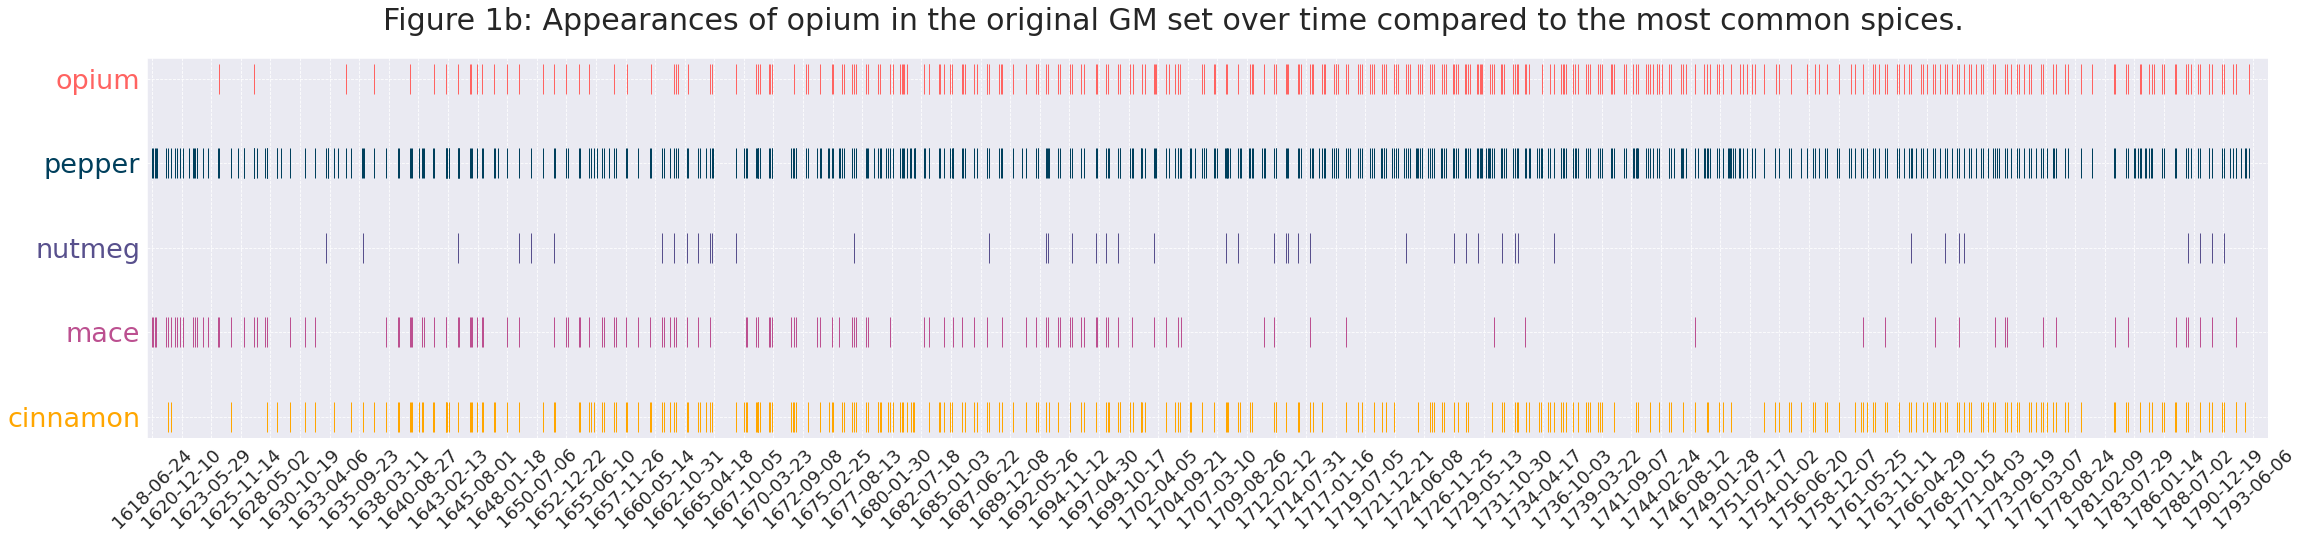

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns # to make things beautiful

target_commodities = ['Opium', 'Peper','Nootmuskaat','Foelie', 'Kaneel']

fig = plt.figure(figsize=(38, 7))
sns.set_style('darkgrid', {'grid.linestyle': '--'})

kleuren = sns.color_palette('''#ff6361
#003f5c
#58508d
#bc5090
#ffa600'''.split('\n')) # https://www.learnui.design/tools/data-color-picker.html#palette


for i, commodity in enumerate(target_commodities):
    plt.plot(appearances[commodity], [i] * len(appearances[commodity]), '|', markersize=30,
                    color=kleuren[i])
    
graph = plt.gca()

graph.set_yticks(range(0,len(target_commodities)))
translated_commodities = ['opium','pepper','nutmeg','mace','cinnamon']

graph.set_yticklabels(translated_commodities,fontsize=27)
miny, nexty, *_, maxy = graph.get_yticks() # get the first two and last y-tick positions
epsy = (nexty - miny) / 4  # compute half the y-tick interval (for example)
graph.set_ylim(miny-epsy,maxy+epsy) # adjust the limits
graph.invert_yaxis()
for ytick, colour in zip(graph.get_yticklabels(), kleuren):
    ytick.set_color(colour) # labels are also coloured

graph.set_xticks(range(0, delta.days+450, 900))
graph.set_xticklabels([str(first_date+datetime.timedelta(days)) for days in range(0, delta.days+450, 900)],
                            rotation=45,fontsize=18)
minx, nextx, *_, maxx = graph.get_xticks() 
epsx = (nextx - minx) / 6  
graph.set_xlim(minx-epsx, maxx+epsx*3)

fig.suptitle('Figure 1b: Appearances of opium in the original GM set over time compared to the most common spices.',
         fontsize=30)
# plt.tight_layout()
plt.savefig('plots/opium_and_spices_latest.png',bbox_inches="tight")